In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob

In [2]:
sns.set_theme()
sns.set_context("poster")

# Causal Model M1

In [16]:
# find ALL .json files under process/results, including in subfolders
files = glob.glob('process/results/**/*.json', recursive=True)

# Read all JSON files into a list of DataFrames
dataframes = [pd.read_json(f) for f in files]

# True treatment effect
tau_m1 = 3

# Combine all DataFrames into a single DataFrame
df_m1 = pd.concat(dataframes, ignore_index=True)

df_m1["Adjustment Set"] = df_m1["Adjustment Set"].apply(lambda x: ' '.join(x) if len(x) != 0 else "Empty")

df_m1["MSE"] = (df_m1["Treatment Effect"] - tau_m1)**2

unique_sets = df_m1['Adjustment Set'].unique()
print("Unique adjustment‐sets in df_sub:", unique_sets)

Unique adjustment‐sets in df_sub: ['W1 W2' 'O2 O1' 'W1' 'W2' 'O1' 'O1 O2' 'W2 W1']


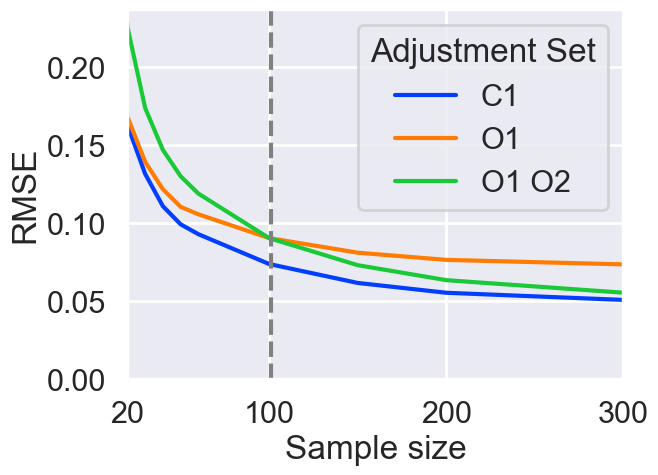

In [65]:
# Sample size threshold
bias_o1o2 = 0
bias_o1 = 0.29 * 1.1/2.5125
size_o1o2, size_o1 = 2, 1
var_o1o2 = 1 / (0.55**2 + 1)
var_o1 = (0.29**2 + 1) / (0.55**2 + 1.1**2 + 1)

thresh_m1_approx = (var_o1o2 - var_o1) / (bias_o1**2 - bias_o1o2**2) + size_o1o2 + 3
thresh_m1 = 100.850936 # including the correction factor for the asymptotic variance (n - |L| - 3) / (n - |K| - 3)

grouped_data_m1 = df_m1[df_m1["Estimated"] == False].groupby(['Sample size', 'Adjustment Set'])['MSE'].mean().reset_index()
grouped_data_m1['RMSE'] = np.sqrt(grouped_data_m1['MSE'])

# x-axis limits
x_min, x_max = 20, 300

# find max RMSE in the specified x-axis range
filtered_grouped_data_m1 = grouped_data_m1[(grouped_data_m1['Sample size'] >= x_min) & (grouped_data_m1['Sample size'] <= x_max)]
max_rmse = filtered_grouped_data_m1['RMSE'].max()

# add margin to max RMSE
y_max = max_rmse * 1.05  

#  plot the RMSE
ax = sns.lineplot(
    data=grouped_data_m1,  
    x='Sample size',
    y='RMSE',
    hue='Adjustment Set',
    palette='bright'
)

ax.axvline(x=thresh_m1, color="gray", linestyle='--')

ax.set_xticks([20, 100, 200, 300])

# x and y axis limits
ax.set_xlim(x_min, x_max)
ax.set_ylim(0, y_max)

# show or save the plot
#plt.show()
plt.savefig(f"m1_example.pdf", bbox_inches='tight')

In [13]:
# define the subset of sample sizes you care about
sample_sizes = [10, 20, 30, 40, 50, 100, 500, 1000]

# 1) filter to only those sample sizes
df_sub = df_m1[df_m1['Sample size'].isin(sample_sizes)].copy()

# 2) mark the Adjustment Set column for the estimated rows
df_sub.loc[df_sub['Estimated'] == True, 'Adjustment Set'] = "On"

# 3) group & take the mean MSE
table_m1 = (
    df_sub
      .groupby(['Sample size', 'Optimality'])['MSE']
      .mean()
      .unstack('Optimality')   # pivot Optimality into columns
      .sort_index()
)

table_m1_std = (
    df_sub
      .groupby(['Sample size', 'Optimality'])['MSE']
      .std()
      .unstack('Optimality')   # pivot Optimality into columns
      .sort_index()
)

print(table_m1)
print(table_m1_std)

Optimality        MSE  Variance
Sample size                    
10           0.092572  0.000261
20           0.030639  0.000196
30           0.018231  0.000181
40           0.013484  0.000173
50           0.010299  0.000170
100          0.004814  0.000164
500          0.000965  0.000157
1000         0.000517  0.000156
Optimality        MSE  Variance
Sample size                    
10           0.234342  0.000353
20           0.067283  0.000169
30           0.037381  0.000128
40           0.026990  0.000107
50           0.020061  0.000094
100          0.009508  0.000064
500          0.001757  0.000028
1000         0.000864  0.000020


In [7]:
table_m1 = df_m1.groupby(['Sample size', 'Adjustment Set'])["MSE"].std()
print(table_m1)

Sample size  Adjustment Set
10           C1                0.122579
             O1                0.117381
             O1 O2             0.259857
             On                0.253670
20           C1                0.040933
             O1                0.042750
             O1 O2             0.081354
             On                0.079324
30           C1                0.025822
             O1                0.027797
             O1 O2             0.046786
             On                0.045385
40           C1                0.018450
             O1                0.021163
             O1 O2             0.032063
             On                0.030860
50           C1                0.014002
             O1                0.016559
             O1 O2             0.024593
             On                0.023626
60           C1                0.012509
             O1                0.015061
             O1 O2             0.020312
             On                0.019599
100         

# Causal Model M2

In [14]:
# find ALL .json files under process/results, including in subfolders
files = glob.glob('process/results_m2/**/*.json', recursive=True)

# Read all JSON files into a list of DataFrames
dataframes = [pd.read_json(f) for f in files]

# True treatment effect
tau_m2 = 0.29

# Combine all DataFrames into a single DataFrame
df_m2 = pd.concat(dataframes, ignore_index=True)

df_m2["Adjustment Set"] = df_m2["Adjustment Set"].apply(lambda x: ' '.join(x) if len(x) != 0 else "Empty")

df_m2["MSE"] = (df_m2["Treatment Effect"] - tau_m2)**2

In [17]:
# define the subset of sample sizes you care about
sample_sizes = [10, 20, 30, 40, 50, 100, 150, 200, 1000]

# 1) filter to only those sample sizes
df_sub = df_m2[df_m2['Sample size'].isin(sample_sizes)].copy()

# 2) mark the Adjustment Set column for the estimated rows
df_sub.loc[df_sub['Estimated'] == True, 'Adjustment Set'] = "On"

# 3) group & take the mean MSE
table_m2 = (
    df_sub
      .groupby(['Sample size', 'Optimality'])['MSE']
      .mean()
      .unstack('Optimality')   # pivot Optimality into columns
      .sort_index()
)

table_m2_std = (
    df_sub
      .groupby(['Sample size', 'Optimality'])['MSE']
      .std()
      .unstack('Optimality')   # pivot Optimality into columns
      .sort_index()
)

print(table_m2)
print(table_m2_std)

Optimality        MSE  Variance
Sample size                    
10           0.141201  0.083111
20           0.047695  0.029557
30           0.027990  0.018878
40           0.020474  0.014342
50           0.016089  0.012029
100          0.007946  0.007867
150          0.005261  0.006237
200          0.004094  0.005756
1000         0.000862  0.004103
Optimality        MSE  Variance
Sample size                    
10           0.290563  0.156267
20           0.077934  0.045063
30           0.043473  0.027285
40           0.031219  0.020545
50           0.023982  0.016455
100          0.011088  0.010004
150          0.007180  0.007295
200          0.005575  0.006258
1000         0.001173  0.002485


a.var(F2): 0.07880774032459426 a.var(O1): 0.0007805453410115868 a.var(O1 O2): 0.6060606060606061
Bias(F2): 0.006242197253433209 Bias(O1): 0.012486065897293785 Bias(O1 O2): 0
Threshold O1 vs. O1 O2: 3887.443302403884
Threshold F2 vs. O1 O2: 13536.438636363633
Threshold F2 vs. O1: 671.2594508099322
Expected MSE n=500, F2: 0.00019785159978583816
Expected MSE n=500, O1: 0.00015747552171457008
Expected MSE n=500, O1 O2: 0.001224364860728497


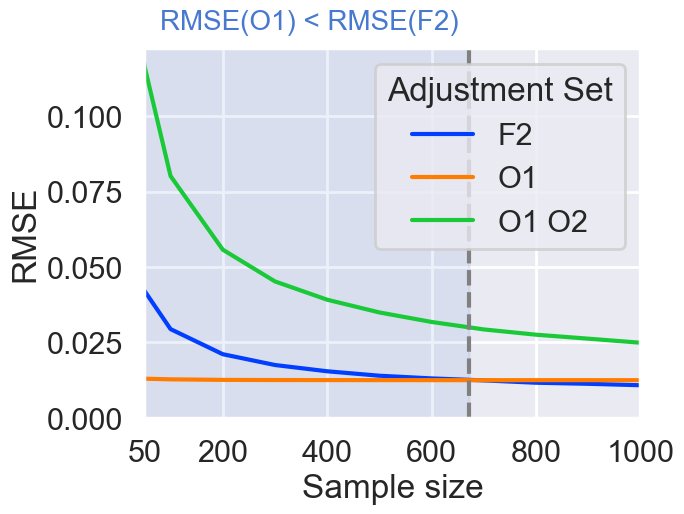

In [63]:
beta_f1a = -1
beta_f2a = 0.1
beta_o2a = 40
beta_f1o1 = 2
beta_f2o1 = 2
beta_o1y = 5
beta_o2y = 0.5
beta_ay = 3  # Coefficient of A in Y

var_f1 = var_f2 = var_o2 = var_error = 1

# Compute variances of O1 and A
var_o1 = beta_f1o1**2 * var_f1 + beta_f2o1**2 * var_f2 + var_error
var_a = beta_f1a**2 * var_f1 + beta_f2a**2 * var_f2 + beta_o2a**2 * var_o2 + var_error
var_y = 1 + beta_o1y**2 * var_o1 + beta_o2y**2 + beta_ay**2 * var_a

# Compute coefficients
beta_ao2 = beta_o2a / var_a
beta_af1 = beta_f1a / var_a
beta_af2 = beta_f2a / var_a
beta_o1f2 = beta_f2o1 / var_o1
beta_o1f1 = beta_f1o1 / var_o1

r2_o1f2 = beta_f2o1**2 / (beta_f1o1**2 + beta_f2o1**2 + 1)

# Compute sigma^2_{Y|A,F2}
sigma2_y_given_af2 = var_y - tau_m2**2 * var_a - (beta_o1y)**2 * var_o1 * r2_o1f2
sigma2_a_given_f2 = 1 + beta_f1a**2 + beta_o2a**2

# Compute the asymptotic variance
avar_f2 = sigma2_y_given_af2 / sigma2_a_given_f2
avar_o1 = (1 + beta_o2y**2) / (1 + beta_o2a**2 + (beta_f1a * beta_o1f1)**2 * var_o1)
avar_o1o2 = 1 / (1 + beta_f1a**2 + beta_f2a**2 - (beta_f1a * beta_o1f1 + beta_f2a * beta_o1f2)**2 * var_o1)

r2_f2o1 = beta_o1f2
r2_f1o1 = beta_o1f1
r2_af2 = beta_f2a**2 / (1 + beta_f1a**2 + beta_f2a**2 + beta_o2a**2)
r2_ao1 = (beta_f2a**2 * r2_f2o1 + beta_f1a**2 * r2_f1o1)/ (1 + beta_f1a**2 + beta_f2a**2 + beta_o2a**2)

bias_f2 = (beta_ao2 * beta_o2y + beta_o1y * beta_f1o1 * beta_af1) / (1 - r2_af2)
bias_o1 = (beta_o2y * beta_ao2) / (1 - r2_ao1)
bias_o1o2 = 0

size_o1o2 = 2
size_o1 = 1
size_f2 = 1

print("a.var(F2):", avar_f2, "a.var(O1):", avar_o1, "a.var(O1 O2):", avar_o1o2)  
print("Bias(F2):", bias_f2, "Bias(O1):", bias_o1, "Bias(O1 O2):", bias_o1o2)

thresh_ex1_approx = (avar_o1o2 - avar_o1) / (bias_o1**2 - bias_o1o2**2) + size_o1o2 + 3
print("Threshold O1 vs. O1 O2:", thresh_ex1_approx)

thresh_ex1_approx_2 = (avar_o1o2 - avar_f2) / (bias_f2**2 - bias_o1o2**2) + size_o1o2 + 3
print("Threshold F2 vs. O1 O2:", thresh_ex1_approx_2)

thresh_ex1_approx_3 = (avar_f2 - avar_o1) / (bias_o1**2 - bias_f2**2) + size_f2 + 3
print("Threshold F2 vs. O1:", thresh_ex1_approx_3)
#thresh_ex1 = 100.850936 # including the correction factor for the asymptotic variance (n - |L| - 3) / (n - |K| - 3)


print("Expected MSE n=500, F2:", avar_f2 / (500 - size_f2 - 3) + bias_f2**2)
print("Expected MSE n=500, O1:", avar_o1 / (500 - size_o1 - 3) + bias_o1**2)
print("Expected MSE n=500, O1 O2:", avar_o1o2 / (500 - size_o1o2 - 3) + bias_o1o2**2)



# Step 1: Filter data where Estimated == False
filtered_data = df_m2[df_m2["Estimated"] == False]

# Step 2: Group data and compute mean MSE
grouped_data = filtered_data.groupby(['Sample size', 'Adjustment Set'])['MSE'].mean().reset_index()

# Step 3: Compute RMSE
grouped_data['RMSE'] = np.sqrt(grouped_data['MSE'])

# Step 4: Define x-axis limits
x_min, x_max = 50, 1000

# Step 5: Filter data within x-axis range
filtered_grouped_data = grouped_data[
    (grouped_data['Sample size'] >= x_min) & (grouped_data['Sample size'] <= x_max)
]

# Step 6: Find max RMSE in the specified x-axis range
max_rmse = filtered_grouped_data['RMSE'].max()

# Optional: Add margin to max RMSE
y_max = max_rmse * 1.05  # Adjust margin as needed

# Step 7: Plot the RMSE
fig, ax = plt.subplots()

# Step 7: Plot the RMSE
ax = sns.lineplot(
    data=grouped_data,  # Use filtered_grouped_data if you prefer
    x='Sample size',
    y='RMSE',
    hue='Adjustment Set',
    palette='bright'
)

thresh = thresh_ex1_approx_3

palette = sns.color_palette("muted")  # Customize as needed


ax.axvline(x=thresh, color="gray", linestyle='--')

# Step 7.2: Highlight regions for n < thresh and n > thresh
# Shade region where n < thresh
ax.fill_betweenx(
    y=np.linspace(0, y_max, 100),  # y-range
    x1=x_min,
    x2=thresh,
    color=palette[0],
    alpha=0.1
)

# Shade region where n > thresh
#ax.fill_betweenx(
 #   y=np.linspace(0, y_max, 100),  # y-range
 #   x1=thresh,
 #   x2=x_max,
 #   color=palette[2],
 #   alpha=0.1
#)

# Step 7.3: Add annotations using figure-relative coordinates
fig.text(
    0.15, 0.92,  # X and Y position in figure coordinates
    "RMSE(O1) < RMSE(F2)",
    ha="left",
    fontsize=20,
    color=palette[0]
)

#fig.text(
#    0.6, 0.9,  # X and Y position in figure coordinates
#    "MSE(O1) > MSE(F2)",
#    ha="left",
#    fontsize=20,
#    color=palette[2]
#)

# Step 8: Set x and y axis limits
ax.set_xlim(x_min, x_max)
ax.set_ylim(0, y_max)

ax.set_xticks([50, 200, 400, 600, 800, 1000])

# Step 9: Update y-axis label
ax.set_ylabel('RMSE')

# Step 10: Update legend title
ax.legend(title="Adjustment Set")

# Show the plot
plt.savefig(f"m2_example.pdf", bbox_inches='tight')
#plt.show()

In [10]:
df_m2["Bias"] = df_m2["Treatment Effect"] - tau_m2
table_m2 = df_m2[df_m2['Sample size']==500].groupby(['Sample size', 'Adjustment Set'])["MSE"].mean()
print(table_m2)

Sample size  Adjustment Set
500          F1                0.000366
             F2                0.000191
             O1                0.000157
             O1 O2             0.001622
Name: MSE, dtype: float64


In [11]:
# Adjust display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df_m2.loc[df_m2['Estimated'] == True, 'Adjustment Set'] = "VarOpt"
df_m2.loc[(df_m2['Estimated'] == True) & (df_m2['Optimality'] == 'MSE'), 'Adjustment Set'] = "On"

table_m2 = df_m2.groupby(['Sample size', 'Adjustment Set'])["MSE"].mean()
print(table_m2)

Sample size  Adjustment Set
10           F2                0.012996
             O1                0.000262
             O1 O2             0.123443
             On                0.097044
             VarOpt            0.000262
20           F2                0.004909
             O1                0.000196
             O1 O2             0.040298
             On                0.031125
             VarOpt            0.000196
30           F2                0.003167
             O1                0.000181
             O1 O2             0.024741
             On                0.019023
             VarOpt            0.000181
40           F2                0.002236
             O1                0.000175
             O1 O2             0.017191
             On                0.013079
             VarOpt            0.000175
50           F2                0.001775
             O1                0.000169
             O1 O2             0.013606
             On                0.010435
            

# Old

In [ ]:
#def get_results_df(entity: str, project: str):
#    api = wandb.Api(timeout=60)
#    runs = api.runs(path=entity + "/" + project)

#    results_list = []

#    for run in runs:
#        results_list.append(run.summary._json_dict)
#        results_list[-1].update({k: v for k, v in run.config.items()
#             if not k.startswith('_')})

#    runs_df = pd.json_normalize(results_list)

#    return runs_df

In [1]:
#df = get_results_df("nadjarutsch", "IAS_examples")

In [6]:
# treatment_effect = 0.2

In [7]:
'''df["MSE"] = (df["Estimated Treatment Effect"] - treatment_effect)**2
df["logMSE"] = np.log(df["MSE"])
df["RMSE"] = np.sqrt(df["MSE"])
df["Adjustment set"] = df["adjustment_set"].apply(lambda x: ' '.join(x))'''

In [8]:
'''col_mapping = {"sample_size": "Sample size"}
df_renamed = df.rename(columns=col_mapping)
df_filtered = df_renamed[(df_renamed["Adjustment set"] != "") & (df_renamed["Sample size"] >= 10) & (df_renamed["Seed"] < 3000)]'

In [4]:
# Define your desired order for the "Adjustment set" column
#adjustment_sets = ['O1 O2', 'O1', 'M1'] 

# Reorder the DataFrame according to your desired order
#df_filtered['Adjustment set'] = pd.Categorical(df_filtered['Adjustment set'], categories=adjustment_sets, ordered=True)
#df_filtered.sort_values('Adjustment set', inplace=True)

In [5]:
# check number of seeds
#for n in df_filtered["Sample size"].unique():
 #   print len(df_filtered[df_filtered["Sample_size"] == n])

In [6]:
#sns.set_theme()
#sns.set_context("poster")

In [6]:
#ax = sns.lineplot(data=df_filtered, x="Sample size", y="RMSE", hue="Adjustment set", palette="bright")

# mark n threshold
#bias_c1 = (0.6*0.1 - 0.3*0.2*0.9*0.5) / (1 - (0.3*0.2)**2)
#bias_o1 = (0.6*0.1) / (1 - (0.3*0.2*0.9)**2)
#size_c1, size_o1 = 1, 1
#var_c1 = (1 - 0.2**2 - (0.9*0.5)**2) / (1 - (0.3*0.2)**2)
#var_o1 = (1 - 0.2**2 - 0.5**2) / (1 - (0.3*0.2*0.9)**2)

#thresh_ex1 = (var_c1 - var_o1) / (bias_o1**2 - bias_c1**2) + size_o1 + 3

#print(thresh_ex1)

#ax.axvline(x=thresh_ex1, color="gray", linestyle='--')

# Manually setting the y-axis limits to encompass the expanded range
#ax.set_ylim(0.08, 0.38)

# Move y-axis label to the top as the main title
#ylabel = ax.get_ylabel()  # Capture the y-axis label
# ax.set_title(fr"{ylabel} of $\hat{{\tau}}$", pad=20)  # Double {{}} are used to escape the braces in f-strings
#ax.set_ylabel('')  # Clear the original y-axis label

# Replace "M1" with "C1" in the labels list
#handles, labels = ax.get_legend_handles_labels()
#labels = ['C1' if label == 'M1' else label for label in labels]
#ax.legend(handles, labels, title="Adjustment set")

#plt.savefig(f"mbias_example.pdf", bbox_inches='tight')
#plt.show()

In [7]:
# Assuming df_fork_filtered is your DataFrame
# Group by 'Sample size' and 'Adjustment set', then calculate the mean and count of 'RMSE'
#result = df_filtered.groupby(['Sample size', 'Adjustment set'])['RMSE'].agg(['mean', 'count']).reset_index()

# Rename columns for clarity
#result.columns = ['Sample size', 'Adjustment set', 'Mean RMSE', 'Count']

# Display the result
#print(result)


# Example 2: Confounding Split

In [7]:
#df_fork = get_results_df("nadjarutsch", "IAS_examples_fork")

In [8]:
#treatment_effect = 0.1

In [9]:
#df_fork["MSE"] = (df_fork["Estimated Treatment Effect"] - treatment_effect)**2
#df_fork["logMSE"] = np.log(df_fork["MSE"])
#df_fork["RMSE"] = np.sqrt(df_fork["MSE"])
#df_fork["Adjustment set"] = df_fork["adjustment_set"].apply(lambda x: ' '.join(x) if len(x) != 0 else "Empty")

In [10]:
#col_mapping = {"sample_size": "Sample size"}
#df_fork_renamed = df_fork.rename(columns=col_mapping)
#df_fork_filtered = df_fork_renamed[(df_fork_renamed["Sample size"] >= 10) & (df_fork_renamed["Seed"] < 3000)]

In [11]:
# Define your desired order for the "Adjustment set" column
#adjustment_sets = ['O1 O2', 'F2'] 

# Reorder the DataFrame according to your desired order
#df_fork_filtered['Adjustment set'] = pd.Categorical(df_fork_filtered['Adjustment set'], categories=adjustment_sets, ordered=True)
#df_fork_filtered.sort_values('Adjustment set', inplace=True)

In [8]:
#ax = sns.lineplot(data=df_fork_filtered, x="Sample size", y="RMSE", hue="Adjustment set", palette="bright")

# mark n threshold
#bias_f2 = (0.7*0.1 - 0.7*0.1*0.5) / (1 - 0.1**2)
#bias_o = 0
#size_f2, size_o = 1, 2
#var_f2 = (1 - (0.9*0.5)**2 - 0.1**2) / (1 - 0.1**2)
#var_o = (1 - 0.1**2 - 0.5**2 - 0.1**2) / (1 - 0.7**2 - (0.1*0.9 - 0.7*0.1)**2)


# mark n threshold
#ax.axvline(x=513.928, color="gray", linestyle='--')

# Move y-axis label to the top as the main title
#ylabel = ax.get_ylabel()  # Capture the y-axis label
#ax.set_title(fr"{ylabel} of $\hat{{\tau}}$", pad=20)  # Double {{}} are used to escape the braces in f-strings
#ax.set_ylabel('')  # Clear the original y-axis label

# Replace "M1" with "C1" in the labels list
#handles, labels = ax.get_legend_handles_labels()
#labels = ['V3' if label == 'F2' else label for label in labels]
#labels = ['V2 V4' if label == 'O1 O2' else label for label in labels]
#ax.legend(handles, labels, title="Adjustment set")

#plt.savefig(f"bs_presentation_example.pdf", bbox_inches='tight')
#plt.show()

In [9]:
# Assuming df_fork_filtered is your DataFrame
# Group by 'Sample size' and 'Adjustment set', then calculate the mean and count of 'RMSE'
#result = df_fork_filtered.groupby(['Sample size', 'Adjustment set'])['RMSE'].agg(['mean', 'count']).reset_index()

# Rename columns for clarity
#result.columns = ['Sample size', 'Adjustment set', 'Mean RMSE', 'Count']

# Display the result
#print(result)



# Example 3: Primary Intersection

In [ ]:
#df_junction = get_results_df("nadjarutsch", "IAS_examples_junction")

In [39]:
#treatment_effect = 0.2

In [40]:
#df_junction["MSE"] = (df_junction["Estimated Treatment Effect"] - treatment_effect)**2
#df_junction["logMSE"] = np.log(df_junction["MSE"])
#df_junction["RMSE"] = np.sqrt(df_junction["MSE"])
#df_junction["Adjustment set"] = df_junction["adjustment_set"].apply(lambda x: "O" if len(x) == 50 else "J1")

In [41]:
#col_mapping = {"sample_size": "Sample size"}
#df_junction_renamed = df_junction.rename(columns=col_mapping)
#df_junction_filtered = df_junction_renamed[(df_junction_renamed["Sample size"] >= 10) & (df_junction_renamed["Seed"] < 3000)]

In [42]:
# Define your desired order for the "Adjustment set" column
#adjustment_sets = ['O', 'J1'] 

# Reorder the DataFrame according to your desired order
#df_junction_filtered['Adjustment set'] = pd.Categorical(df_junction_filtered['Adjustment set'], categories=adjustment_sets, ordered=True)
#df_junction_filtered.sort_values('Adjustment set', inplace=True)

In [10]:
#ax = sns.lineplot(data=df_junction_filtered, x="Sample size", y="RMSE", hue="Adjustment set", palette="bright")

# mark n threshold
#ax.axvline(x=5515/19, color="gray", linestyle='--')

# Move y-axis label to the top as the main title
#ylabel = ax.get_ylabel()  # Capture the y-axis label
#ax.set_title(fr"{ylabel} of $\hat{{\tau}}$", pad=20)  # Double {{}} are used to escape the braces in f-strings
#ax.set_ylabel('')  # Clear the original y-axis label

#plt.savefig(f"junction_example.pdf", bbox_inches='tight')
#plt.show()

# Experiments

In [658]:
#df_experiments = get_results_df("nadjarutsch", "IAS_experiments_new_2")

In [659]:
#treatment_effect = 0.1

In [660]:
#df_experiments["MSE"] = (df_experiments["Estimated Treatment Effect"] - treatment_effect)**2
#df_experiments["RMSE"] = np.sqrt(df_experiments["MSE"])
#df_experiments["Adjustment set"] = df_experiments["adjustment_set"].apply(lambda x: ' '.join(x) if len(x) != 0 else "Empty")

In [661]:
#col_mapping = {"sample_size": "Sample size"}
#df_experiments_renamed = df_experiments.rename(columns=col_mapping)

In [11]:
# Filter rows where Optimality is 'MSE'
#df_optimal_mse = df_experiments_renamed[df_experiments_renamed['optimality'] == 'MSE']
#print(len(df_optimal_mse[(df_optimal_mse['Sample size'] == 50) & (df_optimal_mse['estimate_adjustment_set'] == True)]))

# Group by 'Sample size' and calculate the average RMSE
#df_optimal_mse.groupby(['Sample size', 'estimate_adjustment_set'])['RMSE'].mean()

In [12]:
#df_optimal_mse.groupby(['Sample size', 'estimate_adjustment_set'])['RMSE'].std()

In [13]:
#df_fork_filtered = df_fork_renamed[((df_fork_renamed["Sample size"] == 100) | (df_fork_renamed["Sample size"] == 200) | (df_fork_renamed["Sample size"] == 500) | (df_fork_renamed["Sample size"] == 800)) & (df_fork_renamed["Adjustment set"] == "O1 O2") & (df_fork_renamed["Seed"] <= 202)]

# Group by 'Sample size' and calculate the average RMSE
#df_fork_mse = df_fork_filtered.groupby(['Sample size', 'Adjustment set'])['RMSE'].mean()

# Convert the groupby result into a DataFrame for better presentation
#df_fork_mse = pd.DataFrame(df_fork_mse).reset_index()

# Print the result
#print(df_fork_mse)


In [14]:
#df_optimal_mse["Debiased Estimated Treatment Effect"] = df_optimal_mse["Estimated Treatment Effect"] - df_optimal_mse["Estimated bias"]
#df_optimal_mse = df_optimal_mse[df_optimal_mse["Adjustment set"].apply(lambda x: "F1" not in x)]
#df_optimal_mse["MSE debiased"] = (df_optimal_mse["Debiased Estimated Treatment Effect"] - treatment_effect)**2
#df_optimal_mse["RMSE debiased"] = np.sqrt(df_optimal_mse["MSE debiased"])

# Group by 'Sample size' and calculate the average RMSE
#mse_by_sample_size = df_optimal_mse.groupby('Sample size')['RMSE debiased'].mean()

# Convert the groupby result into a DataFrame for better presentation
#df_mse_by_sample_size = pd.DataFrame(mse_by_sample_size).reset_index()

# Print the result
#print(df_mse_by_sample_size)

In [15]:
#df_optimal_var = df_experiments_renamed[df_experiments_renamed['optimality'] == 'Variance']
#df_optimal_var["Debiased Estimated Treatment Effect"] = df_optimal_var["Estimated Treatment Effect"] - df_optimal_var["Estimated bias"]
#df_optimal_var = df_optimal_var[df_optimal_var["Adjustment set"].apply(lambda x: "F1" not in x)]
#df_optimal_var["MSE debiased"] = (df_optimal_var["Debiased Estimated Treatment Effect"] - treatment_effect)**2
#df_optimal_var["RMSE debiased"] = np.sqrt(df_optimal_var["MSE debiased"])
#print(len(df_optimal_var[df_optimal_var['Sample size'] == 800]))
#mse_by_sample_size = df_optimal_var.groupby('Sample size')['RMSE debiased'].mean()

# Convert the groupby result into a DataFrame for better presentation
#df_mse_by_sample_size = pd.DataFrame(mse_by_sample_size).reset_index()

# Print the result
#print(df_mse_by_sample_size)

In [16]:
#import glob
#import pandas as pd

# Define the two paths
#paths = ['results/*.json', 'results_fork_opt_adj/*.json']  # Update the paths accordingly

# Read all JSON files from both paths into a single DataFrame using a double loop
#dataframes = [pd.read_json(f) for path in paths for f in glob.glob(path)]

# Combine all DataFrames into a single DataFrame
#combined_df = pd.concat(dataframes, ignore_index=True)

In [17]:
#print(combined_df.head())

In [18]:
#combined_df["MSE"] = (combined_df["Treatment Effect"] - 0.1)**2
#combined_df["RMSE"] = np.sqrt(combined_df["MSE"])

# Group by 'Sample size' and calculate the average RMSE
#combined_df[(combined_df["Seed"] < 10000) & (combined_df["Estimated"]==False)].groupby(['Sample size'])['MSE'].std()

In [19]:
#import glob

# Path to the directory containing JSON files
#path = 'results_v3/*.json'  # Update the path accordingly

# Read all JSON files into a list of DataFrames
#dataframes = [pd.read_json(f) for f in glob.glob(path)]

# Combine all DataFrames into a single DataFrame
#combined_df_v2 = pd.concat(dataframes, ignore_index=True)

#combined_df_v2["MSE"] = (combined_df_v2["Treatment Effect"] - 0.1)**2
#combined_df_v2["RMSE"] = np.sqrt(combined_df_v2["MSE"])

# Group by 'Sample size' and calculate the average RMSE
#combined_df_v2.groupby(['Sample size', 'Estimated'])['MSE'].std()

In [20]:
#import glob

# Path to the directory containing JSON files
#path = 'results_mbias/*.json'  # Update the path accordingly

# Read all JSON files into a list of DataFrames
#dataframes = [pd.read_json(f) for f in glob.glob(path)]

# Combine all DataFrames into a single DataFrame
#combined_df_v2 = pd.concat(dataframes, ignore_index=True)

#combined_df_v2["MSE"] = (combined_df_v2["Treatment Effect"] - 0.2)**2
#combined_df_v2["RMSE"] = np.sqrt(combined_df_v2["MSE"])

# Group by 'Sample size' and calculate the average RMSE
#combined_df_v2.groupby(['Sample size', 'Estimated'])['MSE'].mean()

In [21]:
# Count the occurrences of each category
#category_counts = combined_df[(combined_df["Estimated"]==True) & (combined_df["Sample size"]==100)]['Adjustment Set'].value_counts()

# Create a bar plot
#category_counts.plot(kind='bar', color='skyblue')

# Add labels and title
#plt.xlabel('Adjustment Set')
#plt.ylabel('Frequency')
#plt.xticks(rotation=45)  # Rotates labels to avoid overlap

# Show the plot
#plt.show()

In [117]:
import glob

# Path to the directory containing JSON files
path = 'results_fork/*.json'  # Update the path accordingly

# Read all JSON files into a list of DataFrames
dataframes = [pd.read_json(f) for f in glob.glob(path)]

# Combine all DataFrames into a single DataFrame
combined_df_fork = pd.concat(dataframes, ignore_index=True)

combined_df_fork["MSE"] = (combined_df_fork["Treatment Effect"] - 0.1)**2
combined_df_fork["RMSE"] = np.sqrt(combined_df_fork["MSE"])

# Group by 'Sample size' and calculate the average RMSE
combined_df_fork.groupby(['Sample size'])['MSE'].std()

Sample size
10      0.524262
20      0.148647
30      0.081202
40      0.056219
50      0.044203
100     0.020862
150     0.013704
200     0.010146
300     0.007052
400     0.005198
500     0.004321
600     0.003546
1000    0.002241
Name: MSE, dtype: float64

In [115]:
# Path to the directory containing JSON files
path = 'results_fork_100_bt-samples/*.json'  # Update the path accordingly

# Read all JSON files into a list of DataFrames
dataframes = [pd.read_json(f) for f in glob.glob(path)]

# Combine all DataFrames into a single DataFrame
combined_df_fork = pd.concat(dataframes, ignore_index=True)

combined_df_fork["MSE"] = (combined_df_fork["Treatment Effect"] - 0.1)**2
combined_df_fork["RMSE"] = np.sqrt(combined_df_fork["MSE"])

# Group by 'Sample size' and calculate the average RMSE
combined_df_fork.groupby(['Sample size', 'Estimated'])['MSE'].mean()

Sample size  Estimated
10           True         0.253121
20           True         0.087835
30           True         0.051294
40           True         0.037564
50           True         0.029326
100          True         0.014662
150          True         0.009744
200          True         0.007394
300          True         0.005166
400          True         0.003831
500          True         0.003202
600          True         0.002645
1000         True         0.001619
Name: MSE, dtype: float64

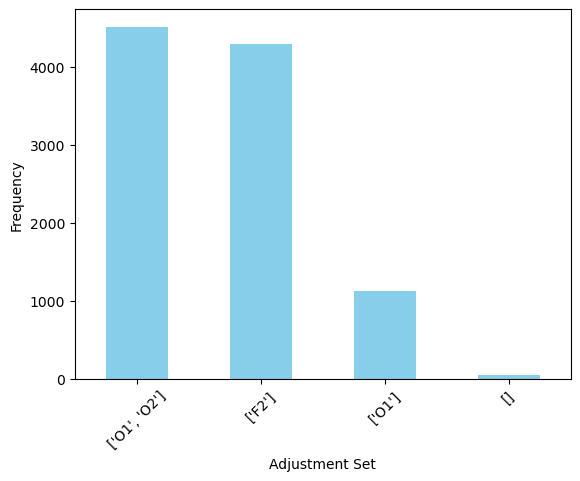

In [55]:
# Count the occurrences of each category
category_counts = combined_df_fork[(combined_df_fork["Estimated"]==True) & (combined_df_fork["Sample size"]==400)]['Adjustment Set'].value_counts()

# Create a bar plot
category_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Adjustment Set')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotates labels to avoid overlap

# Show the plot
plt.show()

## Variance Optimality

### Fork

In [112]:
import glob

# Path to the directory containing JSON files
path = 'results_fork_variance_optimality/*.json'  # Update the path accordingly

# Read all JSON files into a list of DataFrames
dataframes = [pd.read_json(f) for f in glob.glob(path)]

# Combine all DataFrames into a single DataFrame
combined_df_fork = pd.concat(dataframes, ignore_index=True)

combined_df_fork["MSE"] = (combined_df_fork["Treatment Effect"] - 0.1)**2
combined_df_fork["RMSE"] = np.sqrt(combined_df_fork["MSE"])

# Group by 'Sample size' and calculate the average RMSE
combined_df_fork.groupby(['Sample size'])['MSE'].std()

Sample size
10      0.305500
20      0.088061
30      0.048088
40      0.036869
50      0.029585
100     0.016439
150     0.012378
200     0.009896
300     0.007859
400     0.006603
500     0.005797
600     0.005140
1000    0.003973
Name: MSE, dtype: float64

### M-bias

In [72]:
import glob

# Path to the directory containing JSON files
path = 'results_mbias_variance_optimality/*.json'  # Update the path accordingly

# Read all JSON files into a list of DataFrames
dataframes = [pd.read_json(f) for f in glob.glob(path)]

# Combine all DataFrames into a single DataFrame
combined_df_mbias = pd.concat(dataframes, ignore_index=True)

combined_df_mbias["MSE"] = (combined_df_mbias["Treatment Effect"] - 0.2)**2
combined_df_mbias["RMSE"] = np.sqrt(combined_df_mbias["MSE"])

# Group by 'Sample size' and calculate the average RMSE
combined_df_mbias.groupby(['Sample size', 'Estimated'])['MSE'].mean()

Sample size  Estimated
10           True         0.139256
20           True         0.049274
30           True         0.031596
40           True         0.022911
50           True         0.018467
100          True         0.011153
150          True         0.008450
200          True         0.007224
300          True         0.005898
400          True         0.005364
500          True         0.005056
600          True         0.004789
1000         True         0.004260
Name: MSE, dtype: float64

## Bias estimation

### Bootstrap samples = 3000

In [46]:
Bias_true = {
    "[]": 0.080,
    "[O1, O2]": 0,
    "[O1]": 0.070,
    "[O2]": 0.010,
    "[F1, O2]": 0.045,
    "[F2, O2]": 0.035,
    "[F1]": 0.115,
    "[F2]": 0.035
}

# Convert the list in "Adjustment Set" to strings to match keys in Bias_true
combined_df_fork["Adjustment Set"] = combined_df_fork["Adjustment Set"].apply(str)

# Calculate Bias_error using map to apply Bias_true lookup to each element
combined_df_fork["Bias_error"] = (
    np.abs(combined_df_fork["Bias_est"] - combined_df_fork["Adjustment Set"].map(Bias_true)
))

# Group by 'Sample size' and 'Estimated' and calculate the mean of Bias_error
combined_df_fork.groupby(['Sample size', 'Estimated'])['Bias_error'].mean()

Sample size  Estimated
10           True         0.156599
20           True         0.111547
30           True         0.092670
40           True         0.086632
50           True         0.080059
100          True         0.074567
150          True         0.078138
200          True         0.075172
300          True         0.078581
400          True         0.077296
500          True         0.080387
600          True         0.080703
1000         True         0.080833
Name: Bias_error, dtype: float64

### Bootstrap samples = 5000

In [109]:
# Path to the directory containing JSON files
path = 'results_fork_bias_est_5000_bt-samples/*.json'  # Update the path accordingly

# Read all JSON files into a list of DataFrames
dataframes = [pd.read_json(f) for f in glob.glob(path)]

# Combine all DataFrames into a single DataFrame
combined_df_fork = pd.concat(dataframes, ignore_index=True)

# Convert the list in "Adjustment Set" to strings to match keys in Bias_true
combined_df_fork["Adjustment Set"] = combined_df_fork["Adjustment Set"].apply(str)

# Calculate Bias_error using map to apply Bias_true lookup to each element
combined_df_fork["Bias_error"] = (
    np.abs(combined_df_fork["Bias_est"] - combined_df_fork["Adjustment Set"].map(Bias_true)
))

combined_df_fork["MSE"] = (combined_df_fork["Treatment Effect"] - 0.1)**2

# Group by 'Sample size' and 'Estimated' and calculate the mean of Bias_error
combined_df_fork.groupby(['Sample size', 'Estimated'])["MSE"].mean()

Sample size  Estimated
10           True         0.251045
20           True         0.087816
30           True         0.051391
40           True         0.037476
50           True         0.029247
100          True         0.014663
150          True         0.009753
200          True         0.007389
300          True         0.005161
400          True         0.003840
500          True         0.003188
600          True         0.002637
1000         True         0.001621
Name: MSE, dtype: float64

### Bootstrap samples = 100

In [110]:
# Path to the directory containing JSON files
path = 'results_fork_100_bt-samples/*.json'  # Update the path accordingly

# Read all JSON files into a list of DataFrames
dataframes = [pd.read_json(f) for f in glob.glob(path)]

# Combine all DataFrames into a single DataFrame
combined_df_fork = pd.concat(dataframes, ignore_index=True)

# Convert the list in "Adjustment Set" to strings to match keys in Bias_true
combined_df_fork["Adjustment Set"] = combined_df_fork["Adjustment Set"].apply(str)

# Calculate Bias_error using map to apply Bias_true lookup to each element
combined_df_fork["Bias_error"] = (
    np.abs(combined_df_fork["Bias_est"] - combined_df_fork["Adjustment Set"].map(Bias_true)
))

combined_df_fork["MSE"] = (combined_df_fork["Treatment Effect"] - 0.1)**2

# Group by 'Sample size' and 'Estimated' and calculate the mean of Bias_error
combined_df_fork.groupby(['Sample size', 'Estimated'])["MSE"].mean()

Sample size  Estimated
10           True         0.253121
20           True         0.087835
30           True         0.051294
40           True         0.037564
50           True         0.029326
100          True         0.014662
150          True         0.009744
200          True         0.007394
300          True         0.005166
400          True         0.003831
500          True         0.003202
600          True         0.002645
1000         True         0.001619
Name: MSE, dtype: float64